In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report,precision_recall_curve,confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Feature shape: (569, 30)
Target classes: [0 1]
Train size: (410, 30)
Validation size: (73, 30)
Test size: (86, 30)

Validation Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9259    0.9615        27
           1     0.9583    1.0000    0.9787        46

    accuracy                         0.9726        73
   macro avg     0.9792    0.9630    0.9701        73
weighted avg     0.9737    0.9726    0.9724        73



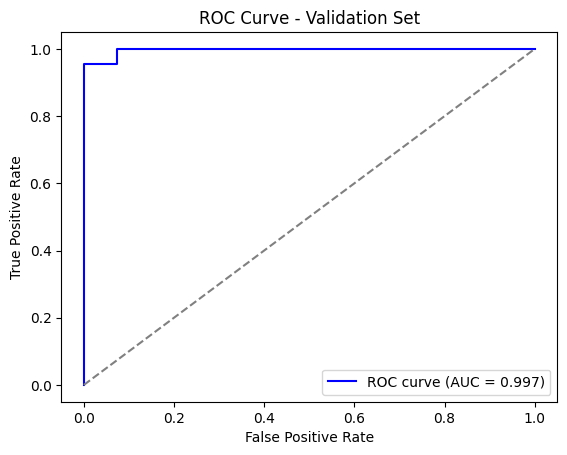

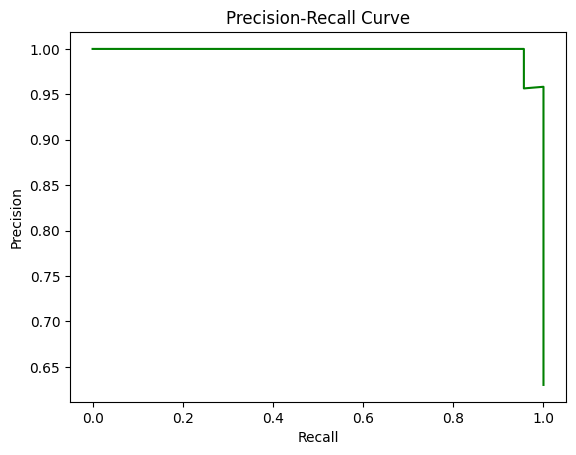


AUC for each fold: [0.99377661 0.99344907 0.99801587 0.97949735 0.99765258]
Average AUC: 0.9924782978664407

Final Test AUC: 0.995


In [5]:

data = load_breast_cancer()
X, y = data.data, data.target
print("Feature shape:", X.shape)
print("Target classes:", np.unique(y))

# Train / Validation / Test Split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42, stratify=y_train_full)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

# Train Model (Logistic Regression)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

#Validation Evaluation
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

#ROC Curve & AUC
y_val_probs = model.predict_proba(X_val)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_val_probs)
plt.figure()
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Cross-Validation (5-Fold, using ROC-AUC)
cv_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("\nAUC for each fold:", cv_auc_scores)
print("Average AUC:", np.mean(cv_auc_scores))

#Final Test Evaluation
y_test_probs = model.predict_proba(X_test)[:, 1]
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_probs)
test_auc = auc(test_fpr, test_tpr)
print(f"\nFinal Test AUC: {test_auc:.3f}")
